# Imports

In [1]:
import datetime as dt
import os
import pandas as pd

import sys
sys.path.insert(0, os.environ.get('SRC_FIGMA_PATH'))

from cryptocurrencyetl import CryptocurrencyEtl
import resources.context as c
from resources.dataanalysis import DataAnalysis
from resources.dataanalysis import DataTransform

# 1.0. Data Extraction

In [2]:
# extract any cryptocurrency historical data to analysis
crypto = 'BTC'
market_curr = 'USD'
api_key = os.environ.get('TOKEN_FIGMA_CRYPTO_KEY')

crypt_etl = CryptocurrencyEtl(crypto=crypto, market_curr=market_curr, api_key=api_key)

#crypt_etl.test_market_curr()
#crypt_etl.test_crypto()

df_btc_usd = crypt_etl.run()

2022-06-19 13:31:42,868 (INFO)	||| Initing extract of ETL to obtain BTC historical data in USD value!
2022-06-19 13:31:44,871 (INFO)	||| Initing data transform of BTC historical data!
2022-06-19 13:31:44,888 (INFO)	||| ETL finished!


In [3]:
# use standard dataset to test notebook's code
#df_btc_usd = pd.read_csv(c.DATA_PROC_FLD / 'btc_usd_proc.csv')

# 2.0. Data Analysis

In [4]:
analy = DataAnalysis(df_btc_usd, date_col='timestamp', individual_figsize=(18, 8), start_date='2021-01-01')

## 2.1. Statistical Description

In [5]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_statistical_description_test.png'
analy.statistical_description(saving_figloc=fig_path)

[0619/133145.045311:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0619/133145.153684:INFO:headless_shell.cc(653)] Written to file /tmp/tmp6bmxhwsy/temp.png.


,attributes,mean,median,std,min,max,range,skew,kurtosis
0,open,44398.289009,43160.900000,9823.576724,18970.79000,67525.820000,48555.030000,0.206181,-0.688016
1,high,45669.585832,44322.000000,9968.210107,19198.00000,69000.000000,49802.000000,0.185018,-0.682607
2,low,42900.496879,42125.480000,9702.936104,17622.00000,66222.400000,48600.400000,0.190390,-0.661362
3,close,44380.114000,43160.900000,9861.849487,18970.79000,67525.830000,48555.040000,0.184885,-0.652084
4,volume,65472.719864,55130.459015,38966.331369,3667.04856,354347.243161,350680.194601,2.398296,9.278037


## 2.2. Temporal Estability

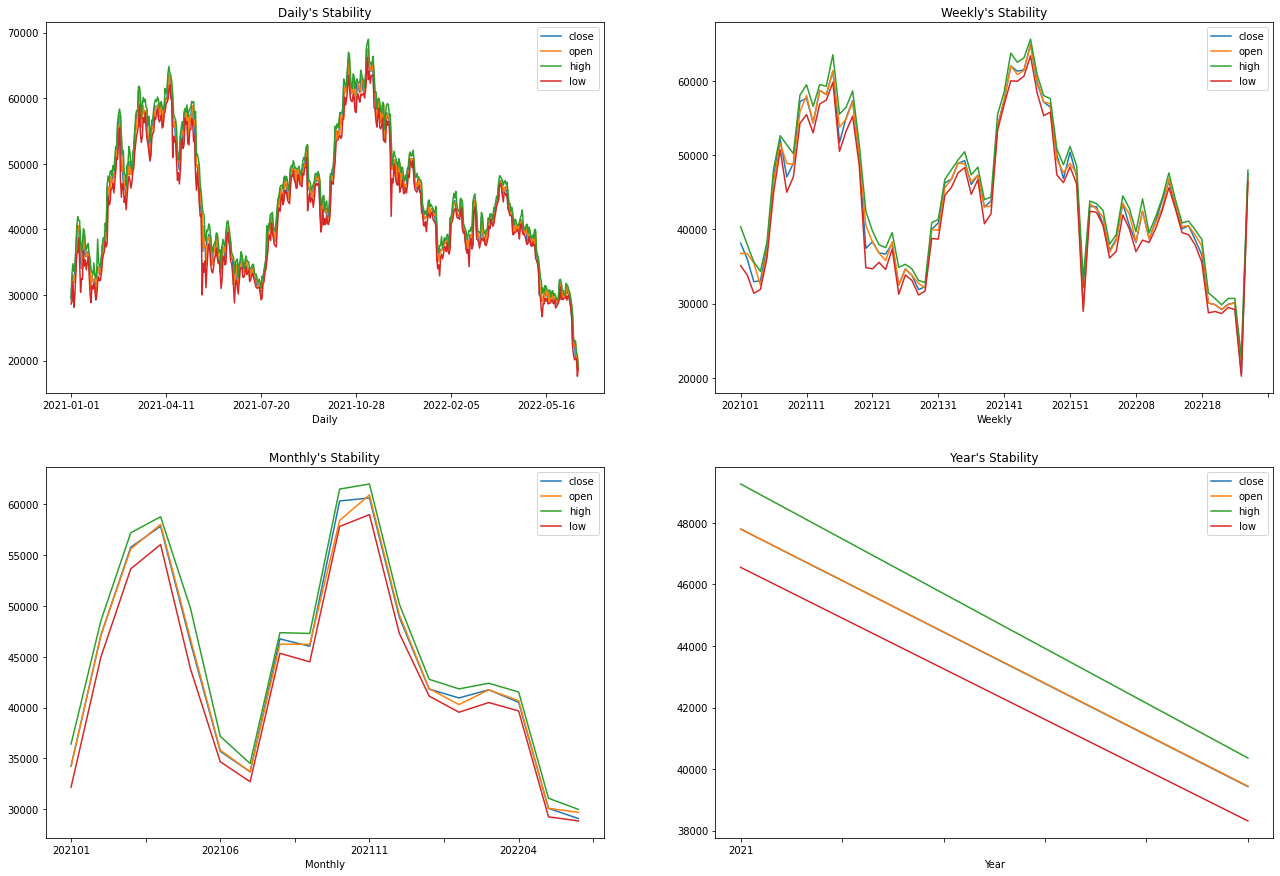

In [6]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_stability_all.jpg'
analy.all_timely_stability(y=['close', 'open', 'high', 'low'], saving_figloc=fig_path)

## 2.3. Outlier Identification

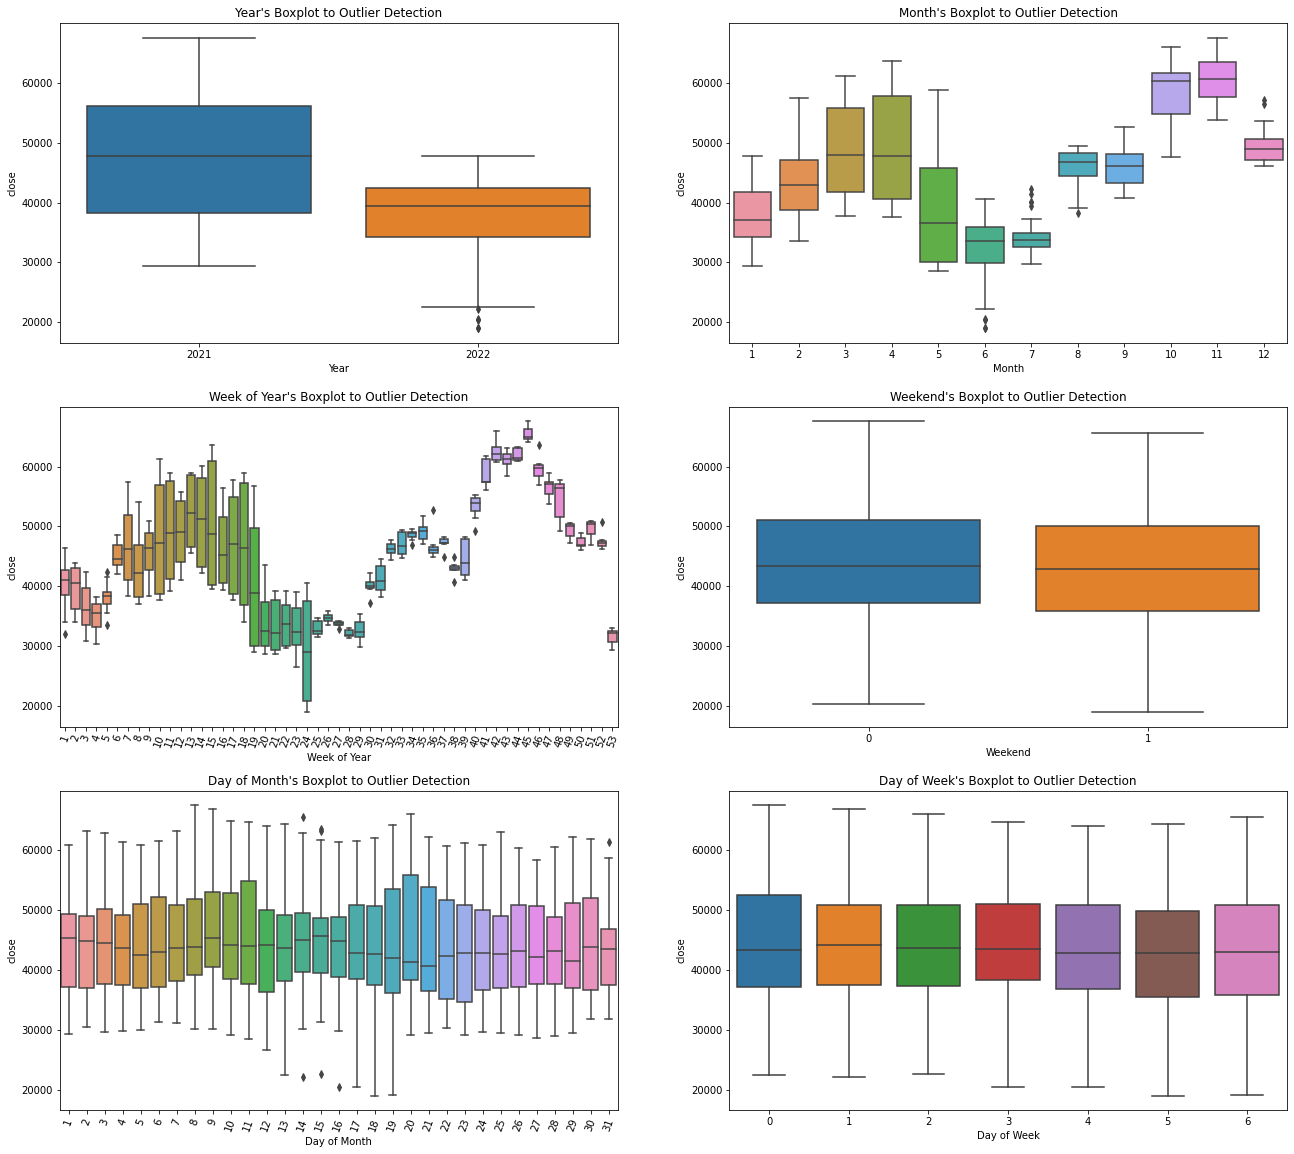

In [7]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_outlier_detector_all.jpg'
analy.all_temporal_outlier_detector_boxplots(y='close', saving_figloc=fig_path)

## 2.4. Distribution

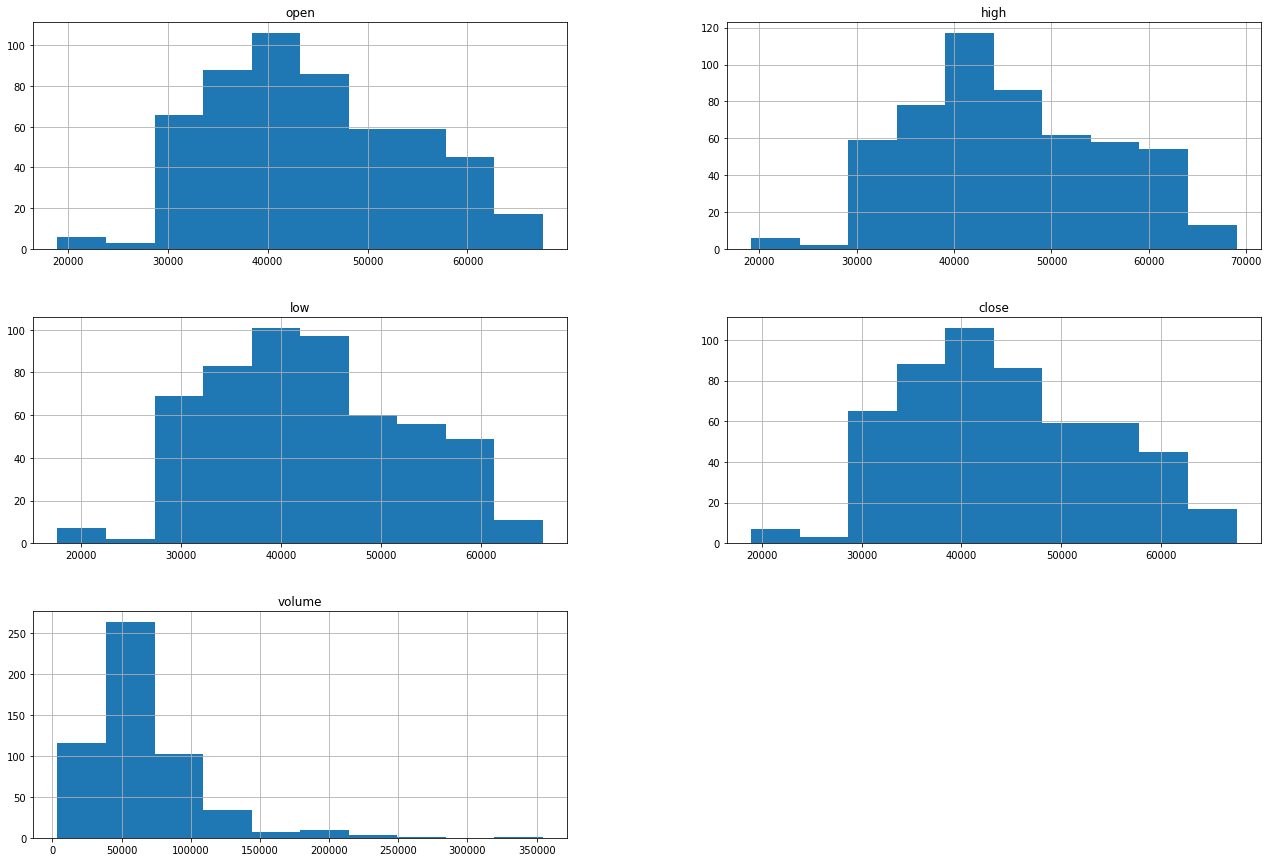

In [8]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_distribution_check.jpg'
analy.distribution_check(saving_figloc=fig_path)

## 2.5. Nature Transformation Effect

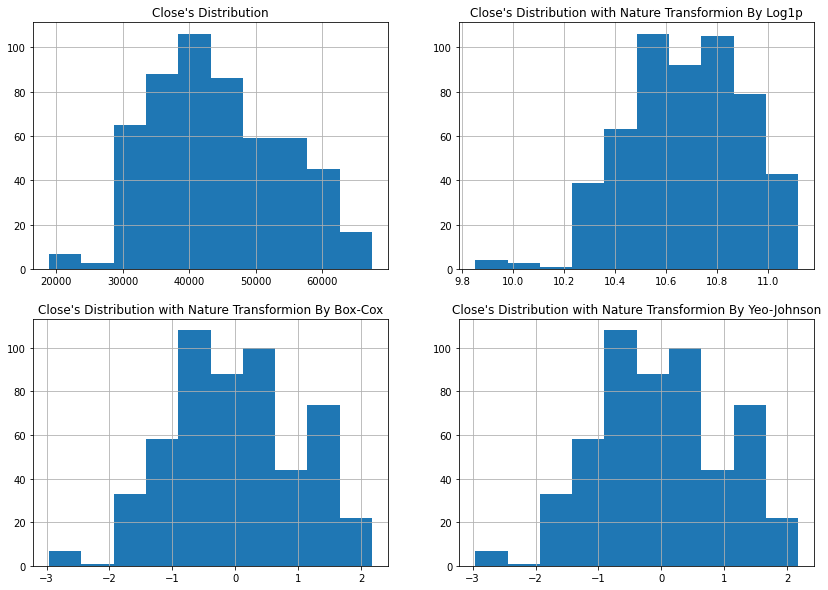

In [9]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_nature_transformation_check.jpg'
analy.nature_transform_effect_check(y='close', all_figsize=(14, 10), saving_figloc=fig_path)

# 3.0. Data Preparation

In [10]:
transforming_df = DataTransform(df=df_btc_usd, date_col='timestamp', individual_figsize=(18, 8), start_date='2021-01-01')
df1, scaler = transforming_df.prepare_dataframe_timeseries(y='close', method='log1p')

2022-06-19 13:31:50,958 (WARNING)	||| The mean difference is below 0.001! (difference = 2.039988116126194e-14)


# 4.0. Machine Learning Model

## 4.1. SARIMAX

### 4.1.1. Modeling

### 4.1.2. Validation

## 4.2. ARIMA

### 4.2.1. Modeling

### 4.2.2. Validation

## 4.3. Saving Model